## Bahdanau Attention

- Bahdanau Attention
$$ Score_{alignment} = W * tanh(W_{decoder} * H_{decoder} + W_{encoder} * H_{encoder}) $$

In [1]:
import tensorflow as tf

In [2]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W_decoder = tf.keras.layers.Dense(units)
        self.W_encoder = tf.keras.layers.Dense(units)
        self.W_combine = tf.keras.layers.Dense(1)
    
    def call(self, H_encoder, H_decoder):
        print("[H_encoder shape :", H_encoder.shape)

        H_encoder = self.W_encoder(H_encoder)
        print("[W_encoder X H_encoder shape :", H_encoder.shape)

        print("\n[H_decoder shape:", H_decoder.shape)
        H_decoder = tf.expand_dims(H_decoder, 1)
        H_decoder = self.W_decoder(H_decoder)

        print("[W_decoder X H_decoder] shape :", H_decoder.shape)

        score = self.W_combine(tf.nn.tanh(H_decoder+H_encoder))
        print("[Score Alignment] shape :", score.shape)

        attention_weights = tf.nn.softmax(score, axis= 1)
        print("\n 최종 weight : \n", attention_weights.numpy())

        context_vector = attention_weights * H_decoder
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [3]:
W_size = 100
print("Hidden State를 {0}차원으로 Mapping\n".format(W_size))

attention = BahdanauAttention(W_size)

enc_state = tf.random.uniform((1, 10, 512))
dec_state = tf.random.uniform((1, 512))

_ = attention(enc_state, dec_state) # def call(self, H_encoder, H_decoder):

Hidden State를 100차원으로 Mapping

[H_encoder shape : (1, 10, 512)
[W_encoder X H_encoder shape : (1, 10, 100)

[H_decoder shape: (1, 512)
[W_decoder X H_decoder] shape : (1, 1, 100)
[Score Alignment] shape : (1, 10, 1)

 최종 weight : 
 [[[0.10007048]
  [0.1439296 ]
  [0.08600781]
  [0.14558655]
  [0.05987153]
  [0.12891363]
  [0.11550775]
  [0.07621623]
  [0.07374223]
  [0.07015409]]]


![](https://aiffelstaticprd.blob.core.windows.net/media/original_images/GN-4-L-9.jpg)

## Loung Attention

$$ Score(H_{target},H_{source}) = H_{target}^T * W_{combine} * H_{source})$$

In [4]:
class LuongAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(LuongAttention, self).__init__()
        self.W_combine = tf.keras.layers.Dense(units)

    def call(self, H_encoder, H_decoder):
        print("[H_encoder] shape: ", H_encoder.shape)

        WH = self.W_combine(H_encoder)
        print("[W_encoder X H_encoder] shape :", WH.shape)

        H_decoder = tf.expand_dims(H_decoder, 1)
        alignment = tf.matmul(WH, tf.transpose(H_decoder, [0, 2, 1]))
        print("[Score_alignmnet] Shape :", alignment.shape)

        attention_weights = tf.nn.softmax(alignment, axis=1)
        print("\n 최종 weight : \n", attention_weights.numpy())

        attention_weights = tf.squeeze(attention_weights, axis=-1)
        context_vector = tf.matmul(attention_weights, H_encoder)

        return context_vector, attention_weights

In [5]:
emb_dim = 512

attention = LuongAttention(emb_dim)

enc_state = tf.random.uniform((1, 10, emb_dim))
dec_state = tf.random.uniform((1, emb_dim))
 
_ = attention(enc_state, dec_state) # def call(self, H_encoder, H_decoder):

[H_encoder] shape:  (1, 10, 512)
[W_encoder X H_encoder] shape : (1, 10, 512)
[Score_alignmnet] Shape : (1, 10, 1)

 최종 weight : 
 [[[2.8449055e-04]
  [1.5892930e-01]
  [5.9588291e-03]
  [1.3501874e-05]
  [6.2614256e-01]
  [2.7874094e-03]
  [1.9993831e-03]
  [1.7853104e-01]
  [6.4159863e-06]
  [2.5346987e-02]]]


## Softmax

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [8]:
predicted_logit = np.array([-2, 1.5, -1, 0.5, 2])
predicted_prob = softmax(predicted_logit)

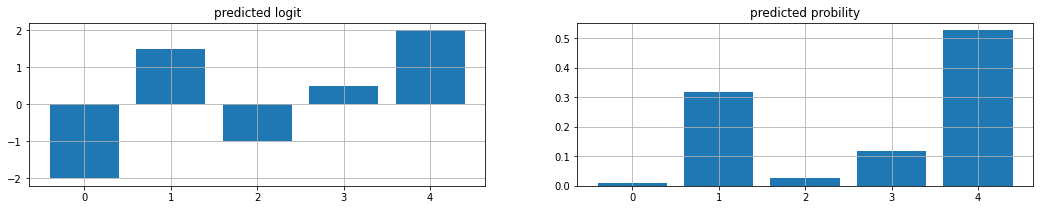

In [9]:
plt.figure(figsize=[18,3])
plt.subplot(1, 2, 1)
plt.title('predicted logit')
plt.bar(np.arange(len(predicted_logit)), predicted_logit)
plt.grid()

plt.subplot(1, 2, 2)
plt.title('predicted probility')
plt.bar(np.arange(len(predicted_prob)), predicted_prob)
plt.grid()
plt.show()

## Cross-entropy

$$ CE(t, y) = - Σ^{k}_{k=1}t_k log y_k$$

- t: one-hot vector
- y probabilty
- k : 카테고리의 수

In [10]:
def cross_entropy(t, y):
    eps = 1e-8
    ce = -np.sum(t * np.log(y + eps))
    return ce

In [11]:
predicted_logit = np.array([-2, 1.5, -1, 0.5, 2])
predicted_prob = softmax(predicted_logit)
target_prob = np.array([0, 0, 0, 0, 1])

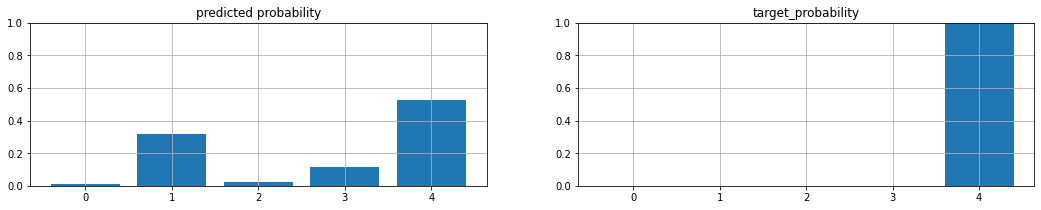

In [12]:
plt.figure(figsize=[18, 3])
plt.subplot(1, 2, 1)
plt.title('predicted probability')
plt.bar(np.arange(len(predicted_prob)), predicted_prob)
plt.grid()
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.title('target_probability')
plt.bar(np.arange(len(target_prob)), target_prob)
plt.grid()
plt.ylim([0, 1])
plt.show()

In [13]:
print('Cross-entropy :', cross_entropy(target_prob, predicted_prob))

Cross-entropy : 0.6406760828883377


In [14]:
predicted_logit = np.array([-2, 1.5, -1, 0.5, 4])
predicted_prob = softmax(predicted_logit)
target_prob = np.array([0, 0, 0, 0, 1])

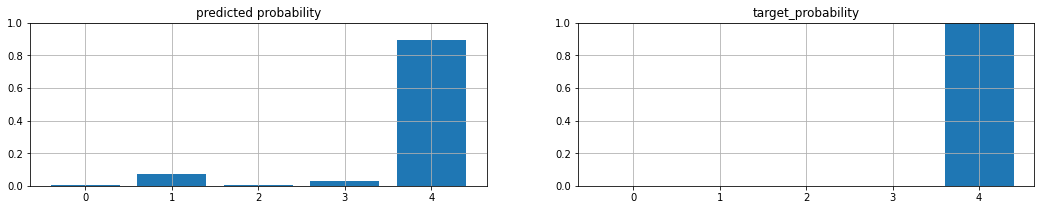

In [15]:
plt.figure(figsize=[18, 3])
plt.subplot(1, 2, 1)
plt.title('predicted probability')
plt.bar(np.arange(len(predicted_prob)), predicted_prob)
plt.grid()
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.title('target_probability')
plt.bar(np.arange(len(target_prob)), target_prob)
plt.grid()
plt.ylim([0, 1])
plt.show()

In [16]:
print('Cross-entropy :', cross_entropy(target_prob, predicted_prob))

Cross-entropy : 0.11466624452246896


In [17]:
predicted_logit = np.array([-2, 1.5, -1, 0.5, 8])
predicted_prob = softmax(predicted_logit)
target_prob = np.array([0, 0, 0, 0, 1])

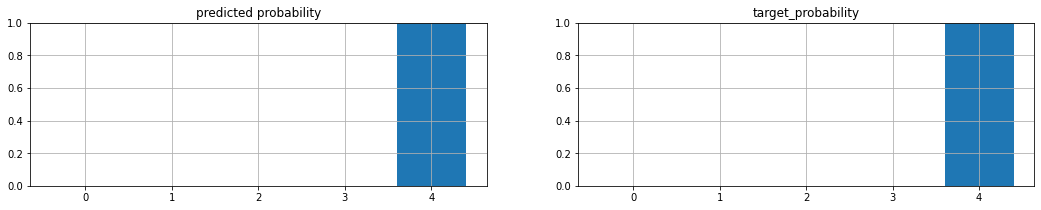

In [18]:
plt.figure(figsize=[18, 3])
plt.subplot(1, 2, 1)
plt.title('predicted probability')
plt.bar(np.arange(len(predicted_prob)), predicted_prob)
plt.grid()
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.title('target_probability')
plt.bar(np.arange(len(target_prob)), target_prob)
plt.grid()
plt.ylim([0, 1])
plt.show()

In [19]:
print('Cross-entropy :', cross_entropy(target_prob, predicted_prob))

Cross-entropy : 0.0022228508878237878


## 양방향 LSTM + 어텐션 메커니즘 (IMDB 리뷰데이터)

In [20]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= vocab_size)

17473536/17464789 [==============================] - 0s 0us/step


In [22]:
print('리뷰의 최대 길이 : {}'.format(max(len(l) for l in x_train)))
print('리뷰의 평균 길이 : {}'.format(sum(map(len, x_train))/len(x_train)))

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


In [23]:
max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

- Bahdanau Attention
$$ Score_{alignment} = W * tanh(W_{decoder} * H_{decoder} + W_{encoder} * H_{encoder}) $$

- Bahdanau Attention
$$ Score_{alignment} = V * tanh(W_{1} * key + W_{2} * query) $$

In [24]:
class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = Dense(units)
        self.W2 = Dense(units)
        self.V = Dense(1)

    def call(self, values, query):
        # query size = (batch size, hidden size)
        # hidden_with_time_axis = (batch size, 1, hidden size)
        hidden_with_time_axis = tf.expand_dims(query, 1)

        # score = (batch size, max_length, 1)
        score = self.V(tf.nn.tanh(self.W1(values) + self.W2(hidden_with_time_axis))) ###

        # attention_weights = (batch size, max_length, 1)
        attention_weights = tf.nn.softmax(score, axis =1)

        # context vector shape after sum = (batch size, hidden size)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [25]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os

In [26]:
sequence_input = Input(shape = (max_len, ), dtype = 'int32')
embedded_sequences = Embedding(vocab_size, 128, input_length=max_len, mask_zero=True)(sequence_input)
lstm = Bidirectional(LSTM(64, dropout = 0.5, return_sequences = True))(embedded_sequences)
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(64, dropout=0.5, return_sequences=True, return_state=True))(lstm)

In [27]:
print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

(None, 500, 128) (None, 64) (None, 64) (None, 64) (None, 64)


In [28]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

In [29]:
attention = BahdanauAttention(64)
context_vecotor, attention_weights = attention(lstm, state_h)

In [30]:
dense1 = Dense(20, activation='relu')(context_vecotor)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation='sigmoid')(dropout)
model = Model(inputs= sequence_input, outputs=output)

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
98/98 [==============================] - 945s 9s/step - loss: 0.4767 - accuracy: 0.7596 - val_loss: 0.2902 - val_accuracy: 0.8819
Epoch 2/10
98/98 [==============================] - 885s 9s/step - loss: 0.2389 - accuracy: 0.9136 - val_loss: 0.2922 - val_accuracy: 0.8781
Epoch 3/10
98/98 [==============================] - 877s 9s/step - loss: 0.1897 - accuracy: 0.9330 - val_loss: 0.3109 - val_accuracy: 0.8798
Epoch 4/10
98/98 [==============================] - 861s 9s/step - loss: 0.1544 - accuracy: 0.9474 - val_loss: 0.3599 - val_accuracy: 0.8726
Epoch 5/10
98/98 [==============================] - 867s 9s/step - loss: 0.1311 - accuracy: 0.9571 - val_loss: 0.3423 - val_accuracy: 0.8722
Epoch 6/10
98/98 [==============================] - 869s 9s/step - loss: 0.1089 - accuracy: 0.9656 - val_loss: 0.4187 - val_accuracy: 0.8692
Epoch 7/10
98/98 [==============================] - 869s 9s/step - loss: 0.0839 - accuracy: 0.9724 - val_loss: 0.4720 - val_accuracy: 0.8695
Epoch 8/10
98

In [33]:
print("\n 테스트 정확도 : %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 599s 766ms/step - loss: 0.7612 - accuracy: 0.8539

 테스트 정확도 : 0.8539


## seq2seq with attention 스페인-영어 번역기

### 데이터 준비하기

In [40]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

In [41]:
path_to_zip = tf.keras.utils.get_file('spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip', extract=True)

In [42]:
path_to_file = os.path.dirname(path_to_zip)+"/spa-eng/spa.txt"

In [43]:
with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size: ", len(raw))
print("Example :")

for sen in raw[0:100][::20]: print(">>", sen)

Data Size:  118964
Example :
>> Go.	Ve.
>> Wait.	Esperen.
>> Hug me.	Abrázame.
>> No way!	¡Ni cagando!
>> Call me.	Llamame.


### 데이터 전처리 : 정제하기

In [44]:
def preprocess_sentence(sentence, s_token=False, e_token=False):
    # 소문자 변경
    sentence = sentence.lower().strip()

    # 1. 문장 부호를 \1
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    # 2. [ ] --> 공백
    sentence = re.sub(r'[" "]+', " ", sentence)
    # 3. 모든 알파벳, 문장기호를 제외한 것들을 공백으로 바꿔주세요.
    sentence = re.sub(r"[^a-zA-Z?!.,]+", " ", sentence)

    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'

    return sentence 

In [45]:
enc_corpus = []
dec_corpus = []

num_examples = 30000

for pair in raw[:num_examples]:
    eng, spa = pair.split("\t")

    enc_corpus.append(preprocess_sentence(eng))
    dec_corpus.append(preprocess_sentence(spa, s_token=True, e_token=True))

print("English :", enc_corpus[100])
print("Spanish :", dec_corpus[100])

English : go away !
Spanish : <start> salga de aqu ! <end>


### 데이터 전처리 : 토큰화

In [46]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)
    
    tensor = tokenizer.texts_to_sequences(corpus)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [47]:
# 정제된 텍스트를 tokenize()함수를 사용해 토큰화해서 텐서로 변환하기!
enc_tensor, enc_tokenizer = tokenize(enc_corpus)
dec_tensor, dec_tokenizer = tokenize(dec_corpus)

In [48]:
# Quiz 1 훈련데이터와 검증데이터를 8:2 분리하세요.
enc_train, enc_val, dec_train, dec_val = train_test_split(enc_tensor, dec_tensor, test_size = 0.2)

In [49]:
# Quiz 2
# index_word를 활용하여 english vocab size 반환
# index_word를 활용하여 spanish vocab size 반환

print('English Vocab Size :', len(enc_tokenizer.index_word))
print('Spanish Vocab Size :', len(dec_tokenizer.index_word))

English Vocab Size : 4931
Spanish Vocab Size : 8893


- Bahdanau Attention
$$ Score_{alignment} = W * tanh(W_{decoder} * H_{decoder} + W_{encoder} * H_{encoder}) $$

In [50]:
# 바다나우 어텐션 클래스 만들기
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape : [batch x length x units]
        # h_dec shape : [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dim(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))

        attn = tf.nn.softmax(score, axis = 1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)
        
        return context_vec, attn

![](https://aiffelstaticprd.blob.core.windows.net/media/images/GN-4-P-2.max-800x600.jpg)

In [51]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        # todo
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units, return_sequences=True)

    def call(self, x):
        # todo
        out = self.embedding(x)
        out = self.gru(out)

        return out

In [52]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        # todo
        pass

    def call(self, x, h_dec, enc_out):
        # todo
        pass

        return out, h_dec, atten

In [53]:
BATCH_SIZE = 64
src_vocab_size = len(enc_tokenizer.index_word)+1
tgt_vocab_size = len(dec_tokenizer.index_word)+1

units = 1024
embedding_dim = 512

encoder = Encoder(src_vocab_size, embedding_dim, units)
decoder = Decoder(tgt_vocab_size, embedding_dim, units)

# sample input
sequence_len = 30

sample_enc = tf.random.uniform((BATCH_SIZE, sequence_len))
sample_output = encoder(sample_enc)

print('Encoder Output :', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))
sample_logits, h_dec, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)), sample_state, sample_output)

print('Decoder output :', sample_logits.shape)
print('Decoder Hidden State :', h_dec.shape)
print('Attention :', attn.shape)

Encoder Output : (64, 30, 1024)


NameError: ignored